# Dataset Downloading

In [1]:
# download dataset
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2020-06-28 17:59:09--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  8.80MB/s    in 40s     

2020-06-28 17:59:50 (7.71 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
# unzip dataset
!unzip rockpaperscissors.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6Cay.png  
  inflating: rockpaperscissors/scissors/2DEYFsJ27UgVq

# Dataset Management

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import shutil
import re
import cv2
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [4]:
!ls

__MACOSX  rockpaperscissors  rockpaperscissors.zip  sample_data


In [5]:
!ls rockpaperscissors

paper  README_rpc-cv-images.txt  rock  rps-cv-images  scissors


In [6]:
imgs_dir = glob.glob('rockpaperscissors/*/*.png')
imgs_dir[:5]

['rockpaperscissors/scissors/zdo3LHesq3aHmu1f.png',
 'rockpaperscissors/scissors/qpw9fZk3IDIXXJEr.png',
 'rockpaperscissors/scissors/533ZH0WCaiOZO0nL.png',
 'rockpaperscissors/scissors/4hvoLYY28SGuZCEI.png',
 'rockpaperscissors/scissors/NeYB1usFd9o84q13.png']

In [7]:
re.findall(r'.*/(.*)/.*', 'rockpaperscissors/paper/UCZlOkcylNYU2ylP.png')

['paper']

In [8]:
Y = []

for img in imgs_dir:
    Y.append(re.findall(r'.*/(.*)/.*', img)[0])

np.unique(Y, return_counts= True)

(array(['paper', 'rock', 'scissors'], dtype='<U8'), array([712, 726, 750]))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(imgs_dir, Y, test_size= 0.2, stratify = Y)

print(np.unique(y_train, return_counts= True))
print(np.unique(y_test, return_counts= True))

(array(['paper', 'rock', 'scissors'], dtype='<U8'), array([569, 581, 600]))
(array(['paper', 'rock', 'scissors'], dtype='<U8'), array([143, 145, 150]))


In [10]:
X_train[:5]

['rockpaperscissors/paper/JFOcfFSm3Ul0Xkha.png',
 'rockpaperscissors/scissors/tY10CBYriMn4lsUO.png',
 'rockpaperscissors/paper/Di7hVJMSS3DzbSTi.png',
 'rockpaperscissors/rock/01dM3ewPIsnBICu1.png',
 'rockpaperscissors/rock/bC7OWmNYjZLjLYnd.png']

In [11]:
X_test[:5]

['rockpaperscissors/paper/ldGrLw1rlUq1nHuw.png',
 'rockpaperscissors/paper/68QZtdP6UaIcIE55.png',
 'rockpaperscissors/rock/9STiLxSOXvh5kjda.png',
 'rockpaperscissors/paper/QWT9FOhLABPyKIUA.png',
 'rockpaperscissors/rock/MReo7XBz7dmQ5HdE.png']

In [12]:
for img in X_train:
    try:
        shutil.move(img, img.replace('rockpaperscissors/', 'train/'))
    except:
        dir = re.findall(r'.*/.*/', img)[0].replace('rockpaperscissors/', 'train/')
        os.makedirs(dir)
        shutil.move(img, img.replace('rockpaperscissors/', 'train/'))

for img in X_test:
    try:
        shutil.move(img, img.replace('rockpaperscissors/', 'test/'))
    except:
        dir = re.findall(r'.*/.*/', img)[0].replace('rockpaperscissors/', 'test/')
        os.makedirs(dir)
        shutil.move(img, img.replace('rockpaperscissors/', 'test/'))

classes = os.listdir('train')
classes

['scissors', 'paper', 'rock']

In [13]:
def get_image_samples(dir):
    categories = os.listdir(dir)
    sample_images = []
    for category in categories:
        dirname = dir+'/' + category
        files = np.random.choice(glob.glob(dirname + '/*.png' ), 7, False)
        sample_images.append(category)
        sample_images.extend(files)
    return sample_images

def show_images(image_list):
    plt.clf()
    plt.figure(figsize = (30,120))
    for idx, img in enumerate(image_list):
        if '.png' not in img:
            plt.subplot(42, 8, idx+1)
            plt.text(.5, .5, img, horizontalalignment='center', verticalalignment='center', fontsize=15)
            plt.axis('off')
            continue

        image = cv2.imread(img)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
        image = cv2.resize(image, (64, 64))

        plt.subplot(42, 8, idx+1)
        plt.imshow(image)
        plt.axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)  
    plt.show()

<Figure size 432x288 with 0 Axes>

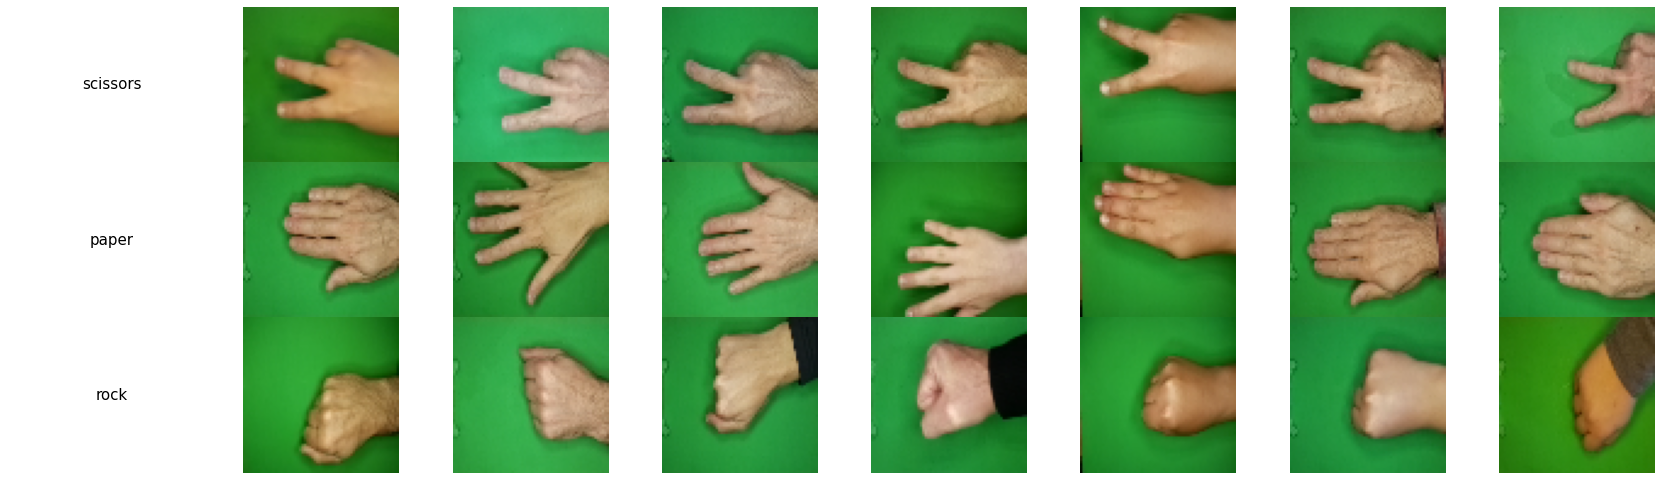

In [14]:
show_images(get_image_samples('train'))

<Figure size 432x288 with 0 Axes>

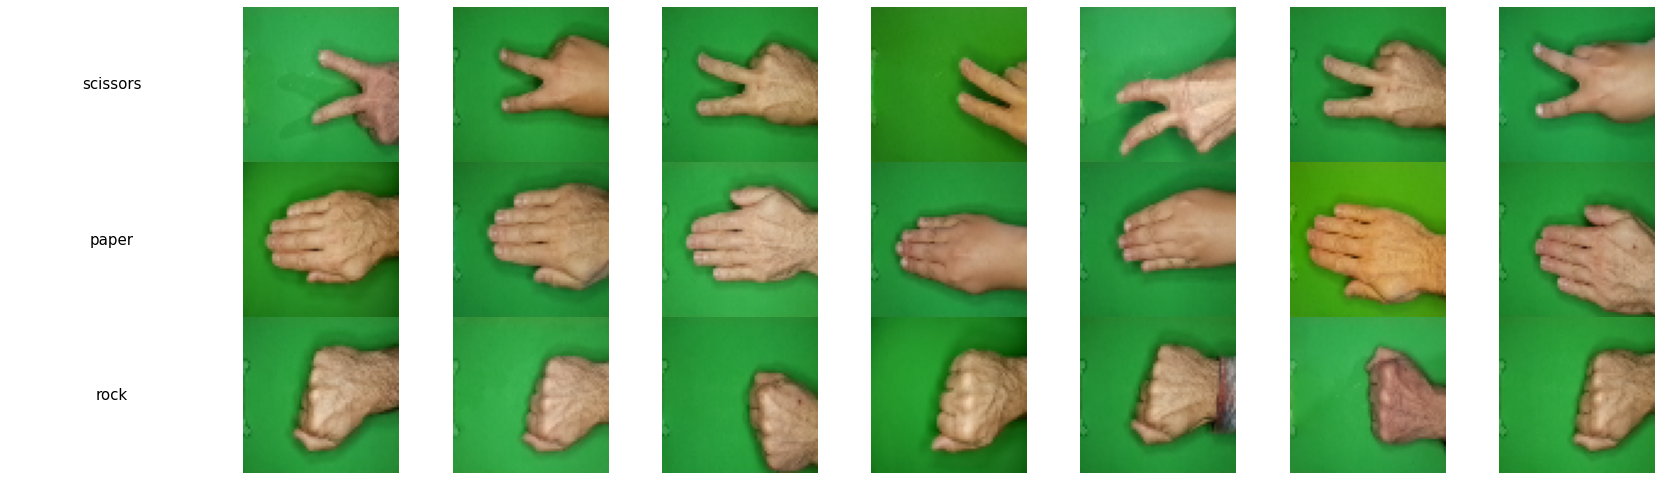

In [15]:
show_images(get_image_samples('test'))

# Deep Learning

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint#, TensorBoard
# Load the TensorBoard notebook extension
# %load_ext tensorboard

from time import time

In [17]:
tf.__version__

'2.2.0'

In [18]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [19]:
# data augmentation
train_datagen = ImageDataGenerator(
                    featurewise_center=True,
                    featurewise_std_normalization=True,
                    rescale=1./255,
                    rotation_range=45,
                    vertical_flip=True,
                    shear_range = 0.1,
                    zoom_range= 0.15,
                    width_shift_range=0.3,
                    height_shift_range=0.15,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    # featurewise_center=True,
                    # featurewise_std_normalization=True,
                    rescale=1./255,
                    # rotation_range=10,
                    # vertical_flip=True,
                    # shear_range = 0.1,
                    # zoom_range= 0.15,
                    # width_shift_range=0.3,
                    # height_shift_range=0.15,
                    fill_mode = 'nearest')

In [20]:
# data generator
train_generator = train_datagen.flow_from_directory(
        'train',
        target_size=(224, 224),
        batch_size=64,
        shuffle= True,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        'test',
        target_size=(224, 224), 
        batch_size=64, 
        shuffle= True,
        class_mode='categorical')

Found 1750 images belonging to 3 classes.
Found 438 images belonging to 3 classes.


In [21]:
# load pre-trained model
pre_trained_model = tf.keras.applications.VGG19(
    include_top=False, weights='imagenet', input_shape=(224, 224, 3),
)

# make pre-trained model untrainable
pre_trained_model.trainable = False

80142336/80134624 [==============================] - 1s 0us/step


In [22]:
# view pre-trained model architecture
pre_trained_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [23]:
# define model
model = tf.keras.models.Sequential([pre_trained_model,
                                    # tf.keras.layers.GlobalAveragePooling2D(),
                                    tf.keras.layers.Conv2D(1024, kernel_size= (2,1), strides= (1,1), activation= tf.keras.layers.LeakyReLU(0.1)),
                                    tf.keras.layers.MaxPool2D(pool_size= (3,3), strides= 1),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation= tf.keras.layers.LeakyReLU(0.1)),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(128, activation= tf.keras.layers.LeakyReLU(0.1)),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(3, activation= 'softmax')])

In [24]:
# view model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
conv2d (Conv2D)              (None, 6, 7, 1024)        1049600   
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 5, 1024)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 4, 5, 1024)        4096      
_________________________________________________________________
flatten (Flatten)            (None, 20480)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               10486272  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0

In [25]:
# compile the model
model.compile(optimizer= tf.keras.optimizers.Nadam(learning_rate= 0.0001), 
              loss= 'categorical_crossentropy',
              metrics= ['accuracy']
              )

In [26]:
# Evaluate the model
loss, acc = model.evaluate(validation_generator, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

7/7 - 2s - loss: 1.1786 - accuracy: 0.3311
Untrained model, accuracy: 33.11%


In [27]:
start = time()

checkpoint_path = 'model_checkpoint/rps.ckpt'

# training the model
history = model.fit(train_generator, epochs= 80, 
                    callbacks= [EarlyStopping(patience= 10, monitor= 'val_loss', verbose= 1), 
                                # TensorBoard(), 
                                ModelCheckpoint(filepath= checkpoint_path, verbose= 0, 
                                                save_best_only= True, save_weights_only= True)],
                    validation_data = validation_generator, verbose= 1)

end = time() - start
print('training finished in {:.3f}s'.format(end))

Epoch 1/80
28/28 [==============================] - 25s 900ms/step - loss: 0.5882 - accuracy: 0.7869 - val_loss: 0.7768 - val_accuracy: 0.4041
Epoch 2/80
28/28 [==============================] - 26s 924ms/step - loss: 0.2386 - accuracy: 0.9097 - val_loss: 0.6006 - val_accuracy: 0.7260
Epoch 3/80
28/28 [==============================] - 26s 924ms/step - loss: 0.1669 - accuracy: 0.9406 - val_loss: 0.3567 - val_accuracy: 0.9795
Epoch 4/80
28/28 [==============================] - 26s 924ms/step - loss: 0.1451 - accuracy: 0.9509 - val_loss: 0.3050 - val_accuracy: 0.9543
Epoch 5/80
28/28 [==============================] - 26s 929ms/step - loss: 0.1259 - accuracy: 0.9543 - val_loss: 0.2626 - val_accuracy: 0.9680
Epoch 6/80
28/28 [==============================] - 26s 931ms/step - loss: 0.1400 - accuracy: 0.9600 - val_loss: 0.1225 - val_accuracy: 1.0000
Epoch 7/80
28/28 [==============================] - 26s 933ms/step - loss: 0.1247 - accuracy: 0.9583 - val_loss: 0.0891 - val_accuracy: 0.9954

In [28]:
end/60 <= 30

True

In [29]:
# %tensorboard --logdir logs

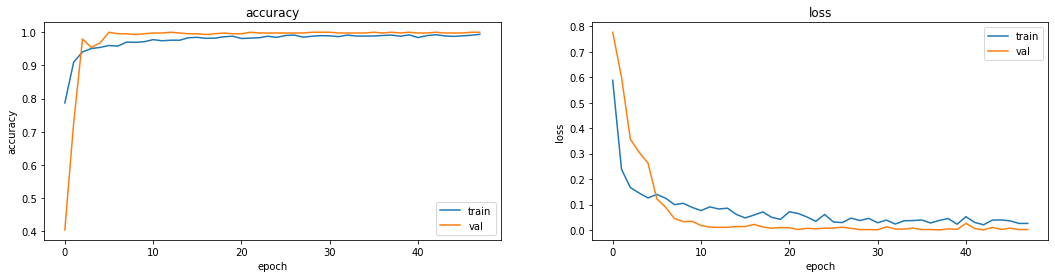

In [30]:
# plot loss and accuracy
fig, (ax1, ax2) = plt.subplots(1,2, figsize= (18, 4))
ax1.plot(history.history['accuracy'], label= 'train')
ax1.plot(history.history['val_accuracy'], label= 'val')
ax1.legend()
ax1.set_title('accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')

ax2.plot(history.history['loss'], label= 'train')
ax2.plot(history.history['val_loss'], label= 'val')
ax2.legend()
ax2.set_title('loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
# ax2.set_yscale('log')

plt.show()

In [31]:
# Loads the weights
model.load_weights(checkpoint_path)
# Save Final Model
model.save('rps_model.h5')

# Model Evaluation

In [32]:
from keras.preprocessing import image

def images_predict(image_list):
    fig = plt.figure(figsize = (30,120))
    for idx, img in enumerate(image_list):
        if '.png' not in img:
            label = img
        else:
            i = image.load_img(img, target_size=(224,224))
            x = image.img_to_array(i)
            x /= 255.
            x = np.expand_dims(x, axis=0)
            
            images = np.vstack([x])
            pred_proba = model.predict(images)[0]
            classes = np.argmax(pred_proba)
            pred = {v:k for k, v in train_generator.class_indices.items()}[classes]

            imag = cv2.imread(img)
            imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB) 
            imag = cv2.resize(imag, (64, 64))

            ax = fig.add_subplot(42, 8, idx+1)
            ax.imshow(imag)
            ax.set_title(f'{pred} {np.max(pred_proba):.2%}\n(actual = {label})', color= 'red' if pred != label else 'green')
            ax.axis('off')

    plt.tight_layout()
    plt.show()

Using TensorFlow backend.


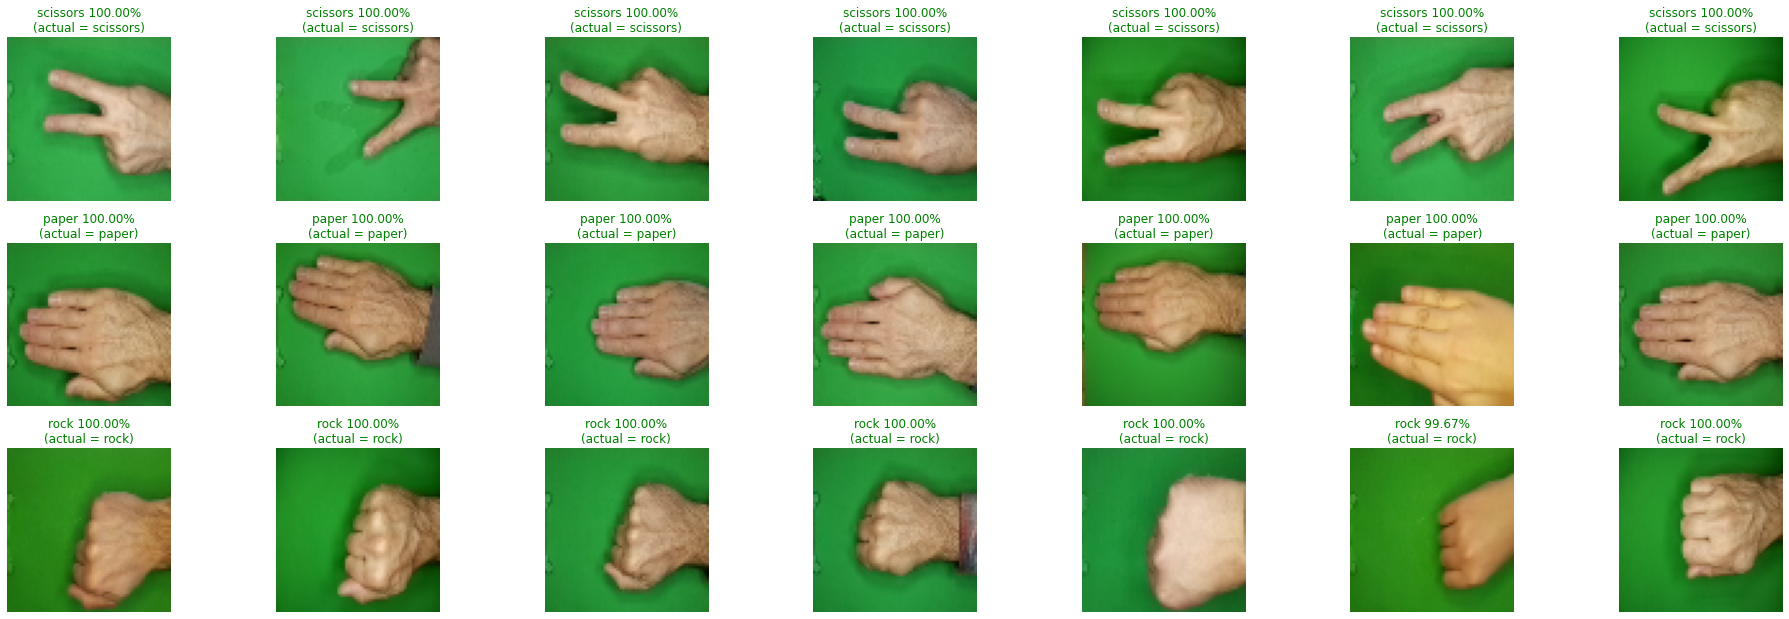

In [33]:
images_predict(get_image_samples('test'))

In [34]:
true, preds = [], []
confusion_matrix = np.zeros([3,3])

for img in glob.glob('test/*/*.png'):
    a = re.findall(r'test/(.*)/.*', img)[0]

    true.append(a)


    i = image.load_img(img, target_size=(224,224))
    x = image.img_to_array(i)
    x /= 255.
    x = np.expand_dims(x, axis=0)
            
    images = np.vstack([x])
    classes = model.predict_classes(images)

    pred = {v:k for k, v in train_generator.class_indices.items()}[classes[0]]

    preds.append(pred)

    confusion_matrix[train_generator.class_indices[a], classes[0]] += 1

true, preds = np.array(true), np.array(preds)

print('accuracy = {:4f}'.format(np.mean(true == preds)))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
accuracy = 1.000000


In [35]:
# confusion matrix
cm = pd.DataFrame(confusion_matrix, 
                  pd.MultiIndex.from_tuples([('Actual', key) for key in train_generator.class_indices.keys()]), 
                  pd.MultiIndex.from_tuples([('Prediction', key) for key in train_generator.class_indices.keys()]))
cm.style.background_gradient(cmap= 'Reds')

# Use uploaded image

Saving scissor 2.jpeg to scissor 2 (1).jpeg
Saving paper.jpeg to paper (1).jpeg
Saving scissor.jpeg to scissor (1).jpeg
scissor 2.jpeg


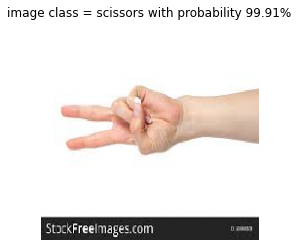

paper.jpeg


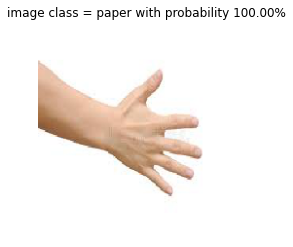

scissor.jpeg


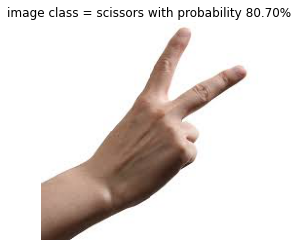

In [38]:
from google.colab.files import upload

uploaded = upload()

for fn in uploaded.keys():
 
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(224,224))
    plt.imshow(img)
    plt.axis('off')
    x = image.img_to_array(img)
    x /= 255.
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    pred_proba = model.predict(images, batch_size=64)[0]
    a = np.argmax(pred_proba)
    pred = {v:k for k, v in train_generator.class_indices.items()}[a]
    
    print(fn)

    plt.title(f'image class = {pred} with probability {np.max(pred_proba):.2%}')
    plt.show()